In [1]:
import sys
import os


notebook_dir = os.path.dirname(os.path.realpath("__file__"))  # Path to notebooks directory
parent_dir = os.path.dirname(notebook_dir)  # Parent directory of notebooks

sys.path.append(parent_dir)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from plotting_style import *

In [31]:
fs_m1 = 8  # for figure ticks
fs = 10  # for regular figure text
fs_p1 = 11  #  figure titles

matplotlib.rc("font", size=fs)  # controls default text sizes
matplotlib.rc("axes", titlesize=fs)  # fontsize of the axes title
matplotlib.rc("axes", labelsize=fs)  # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=fs_m1)  # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=fs_m1)  # fontsize of the tick labels
matplotlib.rc("legend", fontsize=fs_m1)  # legend fontsize
matplotlib.rc(
    "figure", titlesize=fs_p1, dpi=dpi, autolayout=True
)  # fontsize of the figure
matplotlib.rc("lines", linewidth=1, markersize=3)
matplotlib.rc("savefig", dpi=1200, bbox="tight")
matplotlib.rc("grid", alpha=0.3)
matplotlib.rc("axes", grid=True)

# matplotlib.rc("font", **{"family": "serif", "serif": ["Palatino"]})
# matplotlib.rc("text", usetex=True)

RCP_COLOR_MAP = {"Random": "grey", "LTT": "tab:red", "UCB": "tab:green", "CRC": "tab:blue"}
LW = 1.5
ALPHA = 0.3

In [5]:
# based on finetuning runs on 24.7.
MISTRAL7B_acc = {'base': {'gsm8k': [59.7, 59.3], 'math1': [43.3, 43.3], 'math3': [19.3, 19.0], 'math5': [2.3, 2.7]},
                 'FT-1000': {'gsm8k': [52.6, 50.6], 'math1': [42.0, 39.7, 42.7, 44.3], 'math3': [15.0, 13.3, 12.7, 13.7], 'math5': [2.7, 1.0, 2.0, 0.7]},  
                 'Lion-1000': {'gsm8k': [68.3, 64.0], 
                               # 'math1': [47.6, 50.0, 50.0, 52.0], 
                               'math1': [47.6, 50.0,],
                               'math3': [21.0, 22.0], 'math5': [6.0, 4.3]},
                 'Lion-1000-consistency': {'gsm8k': [62.3, 65.7], 'math1': [53.0, 46.7], 'math3': [23.3, 24.7], 'math5': [3.7, 5.0]},
                 'Lion-1000-self_verification': {'gsm8k': [67.3, 66.3], 'math1': [45.0, 48.0], 'math3': [20.7, 20.3], 'math5': [3.7, 6.7]},
                 'OrcaMath-1000': {'gsm8k': [61.7, 61.7], 'math1': [48.3, 47.3], 'math3': [21.0, 20.0], 'math5': [3.3, 3.0]},
                 'OrcaMath-5000': {'gsm8k': [66.7, 66.3], 'math1': [49.3, 50.7], 'math3': [24.3, 24.3], 'math5': [3.3, 3.7]},
                 'RQ_SA_all': {'gsm8k': [], 'math1': [53.0, 50.7, 49.6, 48.6], 'math3': [22.6, 23.0], 'math5': [3.0, 4.0]},
                 'RQ_SA_wrong': {'gsm8k': [], 'math1': [], 'math3': [21.3, 25.0], 'math5': [3.3, 5.0]},
                 'RQ_SA_correct': {'gsm8k': [], 'math1': [48.0, 47.6, 51.7, 54.3], 'math3': [22.3, 22.], 'math5': [5.0, 5.0]},
                 'Lion-1000 + FT-1000': {'gsm8k': [], 'math1': [], 'math3': [], 'math5': []}
                }

# 1) Poster session plot 

In [6]:
RES = MISTRAL7B_acc
DATASETS = list(MISTRAL7B_acc['base'].keys())

/tmp/ipykernel_2746541/1124055926.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'../figures/mistral_exp.png', dpi=1200, bbox_inches='tight')


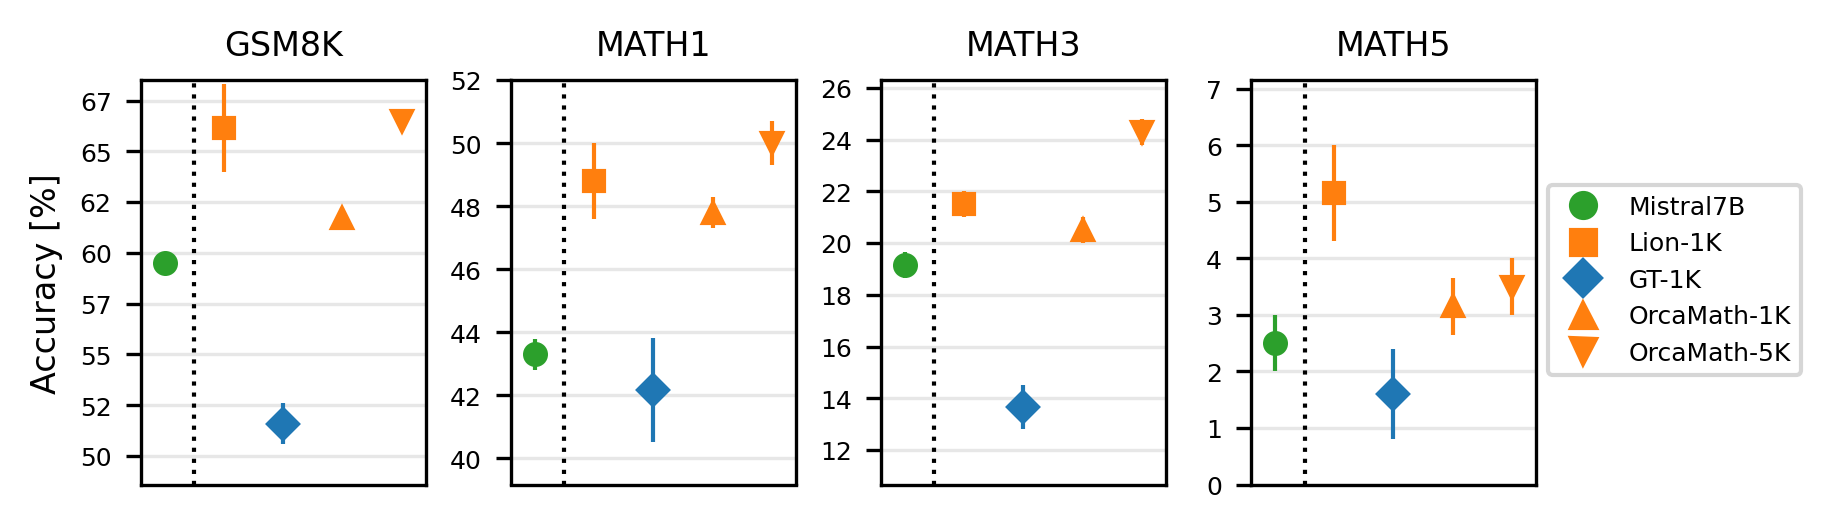

In [7]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(1, 4, figsize=(6, 1.75), sharex=True, gridspec_kw = {'wspace':0.3})

markers = ['o', 's', 'D', '^', 'v']
colors = ['tab:green', 'tab:orange', 'tab:blue', 'tab:orange', 'tab:orange']
models = ['base', 'Lion-1000', 'FT-1000', 'OrcaMath-1000', 'OrcaMath-5000']
label_map = {'base': 'Mistral7B', 'Lion-1000': 'Lion-1K',  'FT-1000': 'GT-1K', 'OrcaMath-1000': 'OrcaMath-1K', 'OrcaMath-5000': 'OrcaMath-5K'}

for i, dataset in enumerate(DATASETS):
    performance = [np.mean(RES[model][dataset]) for model in models]
    performance_err = [max(np.std(RES[model][dataset]), 0.5) for model in models]

    ax = axs[i]
    for j, model in enumerate(models):
        ax.errorbar(j, performance[j], yerr=performance_err[j], marker=markers[j], color=colors[j], label=label_map[model], ms=5)

    ax.set_ylim(max(min(performance) - 3, 0), max(performance) + 2)
    ax.axvline(x=0.5, color='black', linestyle=':', linewidth=1, label=None)
    ax.set_title(f'{dataset}'.upper())
    ax.set_xticks([])  # Remove x-tick labels
    ax.set_xlim([-0.4, 4.4])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

    if i == 0:
        ax.set_ylabel('Accuracy [%]')
    
handles = [plt.Line2D([0], [0], marker=markers[i], color=colors[i], linestyle='None', markersize=5) for i in range(len(models))]
fig.legend(handles, list(label_map.values()), loc='center left', bbox_to_anchor=(0.9, 0.5), markerscale=1.2)


plt.savefig(f'../figures/mistral_exp.png', dpi=1200, bbox_inches='tight')
plt.show()

# 2) Rejection sampling plot

/tmp/ipykernel_2746541/3764763474.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'../figures/reject7.png', dpi=1200, bbox_inches='tight')


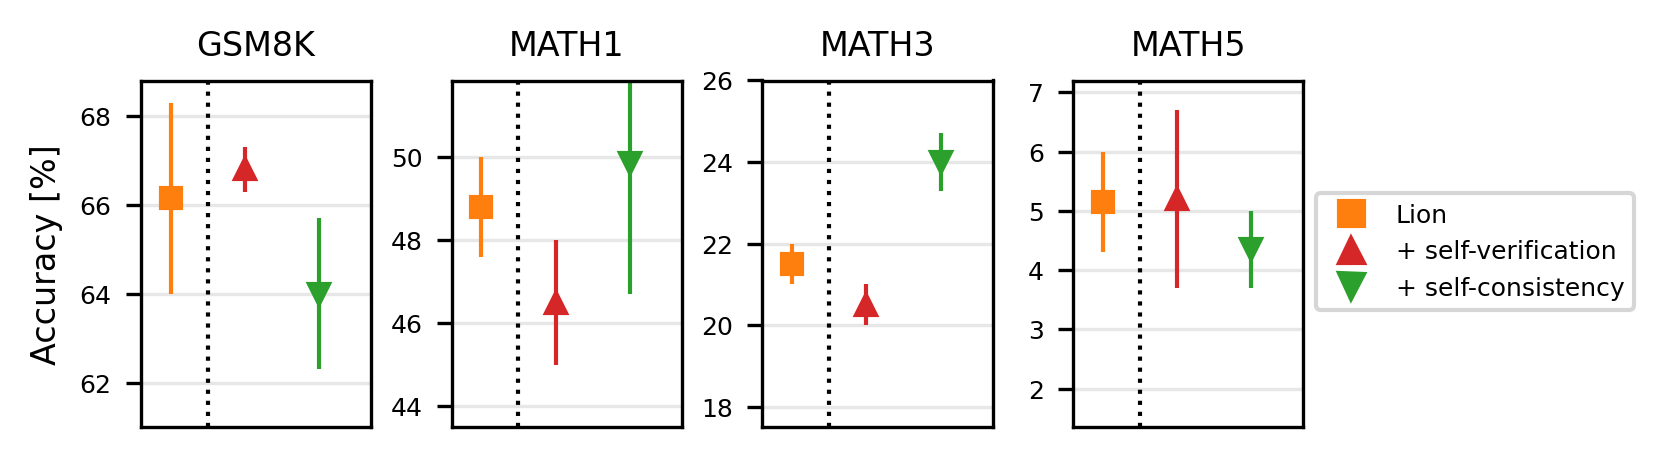

In [8]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(1, 4, figsize=(5, 1.5), sharex=True, gridspec_kw = {'wspace':0.35})

markers = [ 's', '^', 'v']
colors = ['tab:orange', 'tab:red', 'tab:green']
models = ['Lion-1000', 'Lion-1000-self_verification', 'Lion-1000-consistency']
label_map = {'Lion-1000': 'Lion',  'Lion-1000-self_verification': '+ self-verification', 'Lion-1000-consistency': '+ self-consistency'}

for i, dataset in enumerate(DATASETS):
    performance = [np.mean(RES[model][dataset]) for model in models]
    performance_err = [max(np.std(RES[model][dataset]), 0.5) for model in models]

    ax = axs[i]
    for j, model in enumerate(models):
        ax.errorbar(j, performance[j], yerr=performance_err[j], marker=markers[j], color=colors[j], label=label_map[model], ms=5)

    ax.set_ylim(max(min(performance) - 3, 0), max(performance) + 2)
    ax.axvline(x=0.5, color='black', linestyle=':', linewidth=1, label=None)
    ax.set_title(f'{dataset}'.upper())
    ax.set_xticks([])  # Remove x-tick labels
    ax.set_xlim([-0.4, 2.7])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

    if i == 0:
        ax.set_ylabel('Accuracy [%]')
    
handles = [plt.Line2D([0], [0], marker=markers[i], color=colors[i], linestyle='None', markersize=5) for i in range(len(models))]
fig.legend(handles, list(label_map.values()), loc='center left', bbox_to_anchor=(0.9, 0.5), markerscale=1.2)

plt.show()

# 3.1) Lion vs OrcaMath

In [11]:
# # N_test = 300
# RES = {"GSM8K": {"base": [59.7, 59.3], 
#                  "Lion-1K": [68.3, 64.0], "Lion-3.5K": [72.3, 71.3], "Lion-7.5K": [72.6, 75.0], "Lion-10K": [76.3], "Lion-20K": [78.6],
#                  "OrcaMath-1K": [61.7, 61.7], "OrcaMath-3.5K": [66.0, 69.0], "OrcaMath-7.5K": [72.0, 69.3], "OrcaMath-10K": [71.3, 68.7], "OrcaMath-20K": [71.0]}}

# N_test = "all"
RES = {"GSM8K": {"base": [59.7, 59.3], 
                 # "Lion-1K": [67.8, 65.6], "Lion-10K": [72.6, 74.9], "Lion-20K": [76.9],  # LionAll
                 "OrcaMath-1K": [63.4, 63.7], "OrcaMath-10K": [70.9, 70.7], "OrcaMath-20K": [72.7, 73.1],
                 "Lion-1K": [67.2, 67.7], "Lion-10K": [73.8, 74.5], "Lion-20K": [77.5],  # LionHard
                }}


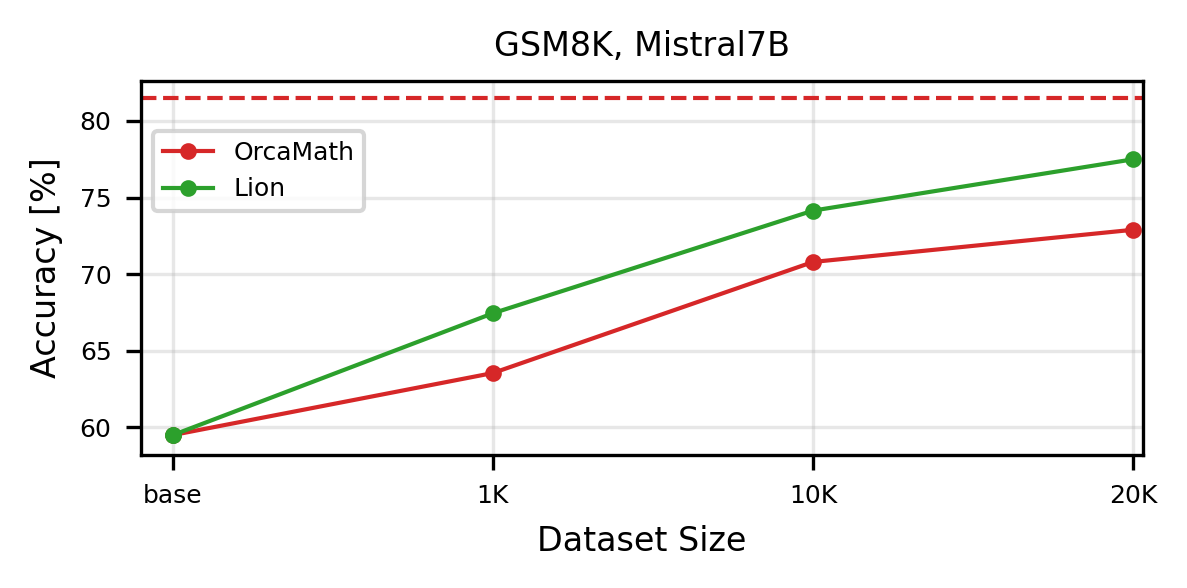

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
# color_map = {"Lion": "tab:orange", "OrcaMath": "tab:blue", "LionHard": "tab:green"}
color_map = {"Lion": "tab:green", "OrcaMath": "tab:red", "LionHard": "tab:green"}

DATASET = "GSM8K"
# sizes = ["1K", "3.5K", "7.5K", "10K"]
# sizes = ["1K", "3.5K", "10K", "20K"]
sizes = ["1K", "10K", "20K"]
ax.errorbar(["base"], np.mean(RES[DATASET]["base"]), np.std(RES[DATASET]["base"]), linestyle='None', marker='o', color="tab:green",)
ax.set_xticks(["base"] + sizes)
ax.set_xticklabels(["base"] + sizes)
ax.set_xlim([-0.1, 3.03])

for ds in ["OrcaMath", "Lion"]:

    performance = [np.mean(RES[DATASET][f"{ds}-{size}"]) if RES[DATASET][f"{ds}-{size}"] else np.nan for size in sizes]
    performance_err = [np.std(RES[DATASET][f"{ds}-{size}"]) if RES[DATASET][f"{ds}-{size}"] else np.nan for size in sizes]
    
    ax.plot(["base"] + sizes, [np.mean(RES[DATASET]["base"])] + performance, marker="o", label=ds, color=color_map[ds])

ax.axhline(y=81.5, ls='--', color='tab:red')

ax.set_ylabel("Accuracy [%]")
ax.set_xlabel("Dataset Size")

plt.legend(loc="upper left",  bbox_to_anchor=(0., 0.9))
plt.title('GSM8K, Mistral7B')


plt.show()

# 5) Real questions, synthetic answers experiment

In [11]:
RES = MISTRAL7B_acc
DATASETS = ["math1", "math3", "math5"]

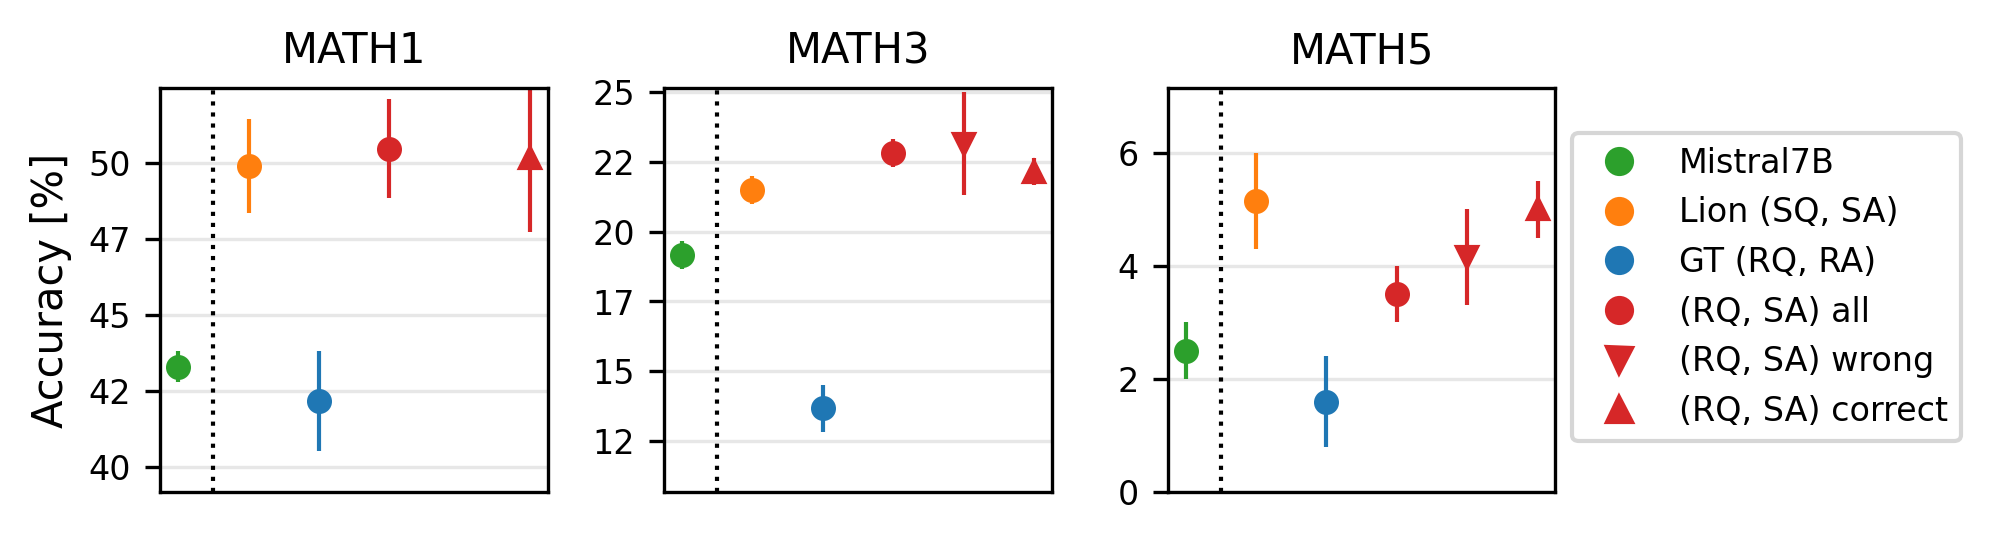

In [14]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(1, len(DATASETS), figsize=(6, 1.75), sharex=True, gridspec_kw = {'wspace':0.3})

markers = ['o', 'o', 'o', 'o', 'v', '^']
colors = ['tab:green', 'tab:orange', 'tab:blue', 'tab:red', 'tab:red', 'tab:red']
models = ['base', 'Lion-1000', 'FT-1000', 'RQ_SA_all', 'RQ_SA_wrong', 'RQ_SA_correct']
label_map = {'base': 'Mistral7B', 'Lion-1000': 'Lion (SQ, SA)',  'FT-1000': 'GT (RQ, RA)', 'RQ_SA_all': '(RQ, SA) all', 'RQ_SA_wrong': '(RQ, SA) wrong', 'RQ_SA_correct': '(RQ, SA) correct'}

for i, dataset in enumerate(DATASETS):
    performance = [np.mean(RES[model][dataset]) for model in models]
    performance_err = [max(np.std(RES[model][dataset]), 0.5) for model in models]

    ax = axs[i]
    for j, model in enumerate(models):
        ax.errorbar(j, performance[j], yerr=performance_err[j], marker=markers[j], color=colors[j], label=label_map[model], ms=5)

    ax.set_ylim(max(min(performance) - 3, 0), max(performance) + 2)
    ax.axvline(x=0.5, color='black', linestyle=':', linewidth=1, label=None)
    ax.set_title(f'{dataset}'.upper())
    ax.set_xticks([])  # Remove x-tick labels
    # ax.set_xlim([-0.4, 4.4])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

    if i == 0:
        ax.set_ylabel('Accuracy [%]')
    
handles = [plt.Line2D([0], [0], marker=markers[i], color=colors[i], linestyle='None', markersize=5) for i in range(len(models))]
fig.legend(handles, list(label_map.values()), loc='center left', bbox_to_anchor=(0.9, 0.5), markerscale=1.2)


# plt.savefig(f'../figures/mistral_exp.png', dpi=1200, bbox_inches='tight')
plt.show()